In [1]:


import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from numpy.random import randn
sns.set_style('whitegrid')
import pandas_datareader as pdweb
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


import cufflinks as cf
cf.go_offline()
import pandas_datareader as pdweb
import datetime
prices = pdweb.get_data_yahoo('TSLA')

In [4]:
#The time span for the purpose is an year, starting from 2019 till 2020

start = datetime.datetime (2019, 1,1)
end =datetime.datetime (2020, 1,1)


In [5]:
#We are just storing the closing prices for each and every constituent of NIFTY BANK index. 
#The 'Adj Close' is the closing price. 



HDFC = pdweb.get_data_yahoo('HDFCBANK.NS', start, end)['Adj Close']
YESBANK = pdweb.get_data_yahoo('YESBANK.NS', start, end)['Adj Close']
KOTAK = pdweb.get_data_yahoo('KOTAKBANK.NS', start, end)['Adj Close']
AXIS = pdweb.get_data_yahoo ('AXISBANK.NS', start, end)['Adj Close']
BOB = pdweb.get_data_yahoo ('BANKBARODA.NS', start, end)['Adj Close']
FEDERAL = pdweb.get_data_yahoo ('FEDERALBNK.NS', start, end)['Adj Close']
ICICI = pdweb.get_data_yahoo ('ICICIBANK.NS', start, end)['Adj Close']
IDFC = pdweb.get_data_yahoo ('IDFCFIRSTB.NS', start, end)['Adj Close']
INDUSIND = pdweb.get_data_yahoo ('INDUSINDBK.NS', start, end)['Adj Close']
RBL = pdweb.get_data_yahoo ('RBLBANK.NS', start, end)['Adj Close']
PNB = pdweb.get_data_yahoo ('PNB.NS', start, end)['Adj Close']
SBI = pdweb.get_data_yahoo('SBIN.NS', start, end)['Adj Close']

In [6]:
bank_list  = ['HDFC', 'YESBANK', 'KOTAK', 'AXIS', 'FEDERAL', 'BOB', 'ICICI', 'INDUSIND', 'RBL', 'PNB', 'SBI', 'IDFC']

In [34]:
bank_list = pd.concat([ HDFC, YESBANK, KOTAK, AXIS, FEDERAL, BOB, ICICI, INDUSIND, RBL, PNB, SBI, IDFC], axis=1, keys = bank_list)
bank_list

,HDFC,YESBANK,KOTAK,AXIS,FEDERAL,BOB,ICICI,INDUSIND,RBL,PNB,SBI,IDFC
Date,,,,,,,,,,,,
2019-01-01,1056.070068,179.324417,1249.776245,626.521912,91.785454,123.300003,361.981659,1587.209961,574.660217,79.800003,299.600006,43.349998
2019-01-02,1046.434082,179.713730,1239.931641,619.280884,93.561943,119.349998,362.827515,1568.309937,562.810547,77.849998,293.899994,42.700001
2019-01-03,1038.223877,179.178436,1234.584473,607.195923,90.798508,119.300003,361.484100,1551.896606,559.723633,77.849998,291.100006,43.049999
2019-01-04,1040.996582,184.580063,1247.277588,618.831421,93.561943,121.699997,363.424622,1540.059204,569.233276,81.300003,297.649994,45.150002
2019-01-07,1042.569824,182.146896,1245.928345,636.659363,93.364555,122.699997,365.912445,1550.951660,571.722717,80.550003,296.299988,46.150002
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,1275.000000,48.000000,1685.599976,760.150024,88.199997,104.250000,549.400024,1524.900024,336.549988,65.349998,337.250000,44.700001
2019-12-30,1282.150024,47.349998,1690.400024,754.099976,87.550003,102.900002,543.950012,1531.400024,345.000000,64.400002,334.399994,44.950001
2019-12-31,1272.099976,46.950001,1684.349976,754.099976,87.949997,101.900002,538.900024,1510.000000,344.850006,64.349998,333.750000,45.150002


In [14]:
#The percent change has been calculated from the closing prices (pct.change) 
#The dropna() has been used to drop the 2019-01-01 values that would have quoted NA as their output, otherwise in the table. 


bank_rets = bank_list.pct_change().dropna()

In [16]:
bank_rets.head()

,HDFC,YESBANK,KOTAK,AXIS,FEDERAL,BOB,ICICI,INDUSIND,RBL,PNB,SBI,IDFC
Date,,,,,,,,,,,,
2019-01-02,-0.009124,0.002171,-0.007877,-0.011558,0.019355,-0.032036,0.002337,-0.011908,-0.020620,-0.024436,-0.019025,-0.014994
2019-01-03,-0.007846,-0.002979,-0.004312,-0.019515,-0.029536,-0.000419,-0.003703,-0.010466,-0.005485,0.000000,-0.009527,0.008197
2019-01-04,0.002671,0.030147,0.010281,0.019163,0.030435,0.020117,0.005368,-0.007628,0.016990,0.044316,0.022501,0.048781
2019-01-07,0.001511,-0.013182,-0.001082,0.028809,-0.002110,0.008217,0.006846,0.007073,0.004373,-0.009225,-0.004536,0.022148
2019-01-08,-0.008318,0.027785,-0.014199,0.021100,0.006871,0.009372,0.033859,0.011930,-0.015937,0.014277,0.030375,-0.003250


In [17]:
rets = bank_rets

In [19]:
#rets defined
#title Monte Carlo Method Explained
##Subtitle The method tries to calculate the future stock prices using Geometric Brownian Motion (GBM)
##

url = ['https://www.investopedia.com/articles/07/montecarlo.asp']
#The above article may be accessed for better understanding

In [20]:

#for Bank of Baroda

days = 365 

dt = 1/days

mu = rets.mean()['BOB']

sigma = rets.std()['BOB']

def stock_monte_carlo (start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    
    drift = np.zeros(days)
    
    for x in range(1, days):
        
        shock[x] = np.random.normal(loc= mu*dt, scale = sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x]= price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

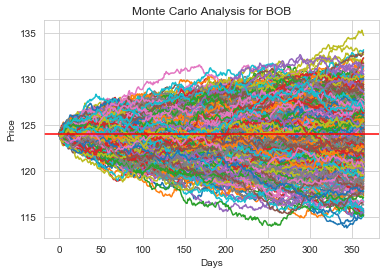

In [25]:
start_price = 124
for run in range(1000):
    plt.plot(stock_monte_carlo (start_price, days, mu, sigma))
    
plt.xlabel ('Days')
plt.ylabel ('Price')
plt.title ('Monte Carlo Analysis for BOB')
plt.axhline(y = start_price, color = 'r', linestyle = '-')

In [26]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
    

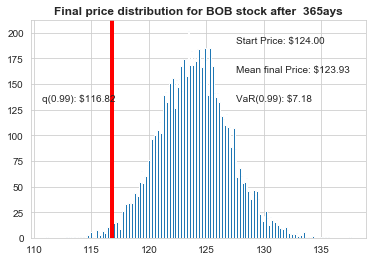

In [28]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins= 200)

#Starting Price
plt.figtext(0.6, 0.8, s = "Start Price: $%.2f" %start_price)


#Mean ending price
plt.figtext(0.6, 0.7, s = "Mean final Price: $%.2f" %simulations.mean())

#Variance of the price (within 99 percent confidence interval)

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth = 4, color = 'r')

plt.title(u"Final price distribution for BOB stock after % days" %days, weight= 'bold');

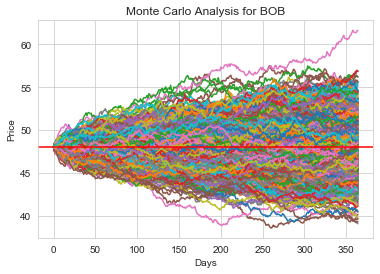

In [35]:
#for YES BANK 

days = 365 

dt = 1/days

mu = rets.mean()['YESBANK']

sigma = rets.std()['YESBANK']

def stock_monte_carlo (start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    
    drift = np.zeros(days)
    
    for x in range(1, days):
        
        shock[x] = np.random.normal(loc= mu*dt, scale = sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x]= price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

start_price = 48
for run in range(1000):
    plt.plot(stock_monte_carlo (start_price, days, mu, sigma))
    
plt.xlabel ('Days')
plt.ylabel ('Price')
plt.title ('Monte Carlo Analysis for BOB')
plt.axhline(y = start_price, color = 'r', linestyle = '-')


    



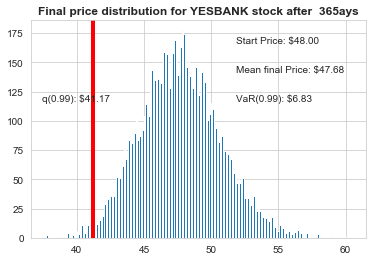

In [36]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
    
q = np.percentile(simulations, 1)

plt.hist(simulations, bins= 200)

#Starting Price
plt.figtext(0.6, 0.8, s = "Start Price: $%.2f" %start_price)


#Mean ending price
plt.figtext(0.6, 0.7, s = "Mean final Price: $%.2f" %simulations.mean())

#Variance of the price (within 99 percent confidence interval)

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth = 4, color = 'r')

plt.title(u"Final price distribution for YESBANK stock after % days" %days, weight= 'bold');

In [44]:
rets['BOB'].quantile(0.01)

-0.06055388858978937

In [45]:
rets['YESBANK'].quantile(0.01)

-0.15487531386521358

In [46]:
rets['HDFC'].quantile(0.01)

-0.027390743076285005

In [47]:
rets['KOTAK'].quantile(0.01)

-0.03077123584356242

In [48]:
rets['AXIS'].quantile(0.01)

-0.03010560042550564

In [49]:
rets['FEDERAL'].quantile(0.01)

-0.04253130393425826

In [50]:
rets['ICICI'].quantile(0.01)

-0.03588287835309362

In [52]:
rets['INDUSIND'].quantile(0.01)

-0.06404586554868927

In [53]:
rets['RBL'].quantile(0.01)

-0.10837988428053527

In [54]:
rets['PNB'].quantile(0.01)

-0.06807979979063629

In [55]:
rets['SBI'].quantile(0.01)

-0.04779932889810798

In [56]:
rets['IDFC'].quantile(0.01)

-0.05023699911766109

In [41]:
#In Case of Bank of Baroda there is 99 percent chances that you wouldn't lose more than 6.05 percent
#In Case of HDFC there is 99 percent chances that you wouldn't lose more than 2.73 percent
#In Case of Yes Bank there is 99 percent chances that you wouldn't lose more than 15.48 percent
#In Case of Kotak Bank there is 99 percent chances that you wouldn't lose more than 3.07 percent
#In Case of Axis Bank there is 99 percent chances that you wouldn't lose more than 3.01 percent
#In Case of Federal Bank there is 99 percent chances that you wouldn't lose more than 4.25 percent
#In Case of ICICI there is 99 percent chances that you wouldn't lose more than 3.58 percent
#In Case of IndusInd there is 99 percent chances that you wouldn't lose more than 6.40 percent
#In Case of RBL there is 99 percent chances that you wouldn't lose more than 10.83 percent
#In Case of PNB there is 99 percent chances that you wouldn't lose more than 6.80 percent
#In Case of SBI there is 99 percent chances that you wouldn't lose more than 4.77 percent
#In Case of IDFC there is 99 percent chances that you wouldn't lose more than 5.02 percent

Text(0, 0.5, 'Risk')

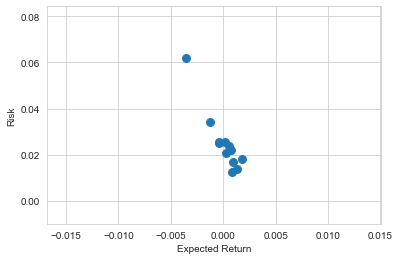

In [61]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s= area)

plt.xlabel('Expected Return')

plt.ylabel ('Risk')



In [58]:
rets.mean()

HDFC        0.000889
YESBANK    -0.003564
KOTAK       0.001292
AXIS        0.000918
FEDERAL     0.000229
BOB        -0.000374
ICICI       0.001809
INDUSIND    0.000167
RBL        -0.001230
PNB        -0.000409
SBI         0.000747
IDFC        0.000535
dtype: float64

In [59]:
rets.std()

HDFC        0.012424
YESBANK     0.061860
KOTAK       0.013806
AXIS        0.016798
FEDERAL     0.020596
BOB         0.024922
ICICI       0.017845
INDUSIND    0.025457
RBL         0.034124
PNB         0.025585
SBI         0.021795
IDFC        0.023573
dtype: float64